In [ ]:
import numpy as np
import pandas as pd

# Load the data from the Excel file into a DataFrame
excel_file_path = '/content/Lab Session1 Data.xlsx'
df = pd.read_excel(excel_file_path)


# Matrix A contains the independent variables of the dataset
# Matrix C contains the dependent variables of the dataset
matrix_A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
matrix_C = df[['Payment (Rs)']].values

# Print the matrices
print("Matrix A:")
print(matrix_A)
print("\nMatrix C:")
print(matrix_C)

# Calculate the dimensionality of the vector space for Matrix A
dimensionality_A = matrix_A.shape
print("\nDimensionality of the vector space for Matrix A:", dimensionality_A)

# Calculate the number of vectors in the vector space
num_vectors_A = matrix_A.shape[0]
print("Number of vectors in the vector space for Matrix A:", num_vectors_A)


rank_A = np.linalg.matrix_rank(matrix_A)
print("Rank of Matrix A:", rank_A)

# Calculate the pseudo-inverse of Matrix A
A_pseudo_inverse = np.linalg.pinv(matrix_A)

print("\nPseudo-inverse of Matrix A:")
print(A_pseudo_inverse)


Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]

Matrix C:
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]

Dimensionality of the vector space for Matrix A: (10, 3)
Number of vectors in the vector space for Matrix A: 10
Rank of Matrix A: 3

Pseudo-inverse of Matrix A:
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [ ]:
import numpy as np
import pandas as pd

# Load the data from the Excel file into a DataFrame
excel_file_path = '/content/Lab Session1 Data.xlsx'
df = pd.read_excel(excel_file_path)

# Extract Matrix A and Matrix C
# Matrix A contains the independent variables of the dataset
# Matrix C contains the dependent variables of the dataset
matrix_A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
matrix_C = df[['Payment (Rs)']].values

# Calculate the pseudo-inverse of Matrix A
A_pseudo_inverse = np.linalg.pinv(matrix_A)

# Calculate the model vector X
model_vector_X = np.dot(A_pseudo_inverse, matrix_C)

# Print the model vector X
print("Model Vector X:")
print(model_vector_X)


Model Vector X:
[[ 1.]
 [55.]
 [18.]]


In [13]:
import numpy as np
import pandas as pd

# Load the data from the Excel file into a DataFrame
excel_file_path = '/content/Lab Session1 Data.xlsx'
df = pd.read_excel(excel_file_path)

# Create a binary target variable 'Class' based on payments above Rs. 200
df['Class'] = np.where(df['Payment (Rs)'] > 200, 'RICH', 'POOR')

# Select features (independent variables)
features = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()

# Standardize the features
features_mean = np.mean(features, axis=0)
features_std = np.std(features, axis=0)
features_scaled = (features - features_mean) / features_std

# Initialize and classify using the KNN model
def knn_classify(X, y, k):
    classifications = []
    for i in range(len(X)):
        # Calculate distances to all other points
        distances = [np.linalg.norm(X[i] - X[j]) for j in range(len(X))]

        # Sort distances and get indices of k-nearest neighbors
        sorted_indices = sorted(range(len(distances)), key=lambda x: distances[x])
        k_nearest_indices = sorted_indices[1:k+1]  # Exclude the point itself

        # Count occurrences of each class in the k-nearest neighbors
        class_counts = {label: 0 for label in np.unique(y)}
        for idx in k_nearest_indices:
            class_counts[y[idx]] += 1

        # Assign the class with the highest count as the classification
        classified_label = max(class_counts, key=class_counts.get)
        classifications.append(classified_label)
    return classifications

# Assuming k=3 for the nearest neighbors
k = 3
classified_classes = knn_classify(features_scaled, df['Class'].to_numpy(), k)

# Add the classified class to the DataFrame
df['Classified_Class'] = classified_classes

# Print the DataFrame with classified classes
print(df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)', 'Class', 'Classified_Class']])


   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Class  \
0           20             6                 2           386  RICH   
1           16             3                 6           289  RICH   
2           27             6                 2           393  RICH   
3           19             1                 2           110  POOR   
4           24             4                 2           280  RICH   
5           22             1                 5           167  POOR   
6           15             4                 2           271  RICH   
7           18             4                 2           274  RICH   
8           21             1                 4           148  POOR   
9           16             2                 4           198  POOR   

  Classified_Class  
0             RICH  
1             POOR  
2             RICH  
3             POOR  
4             RICH  
5             POOR  
6             RICH  
7             RICH  
8             POOR  
9             POOR 

In [ ]:
import pandas as pd
import statistics

# Load the data from the Excel file into a DataFrame
excel_file_path = '/content/Lab Session1 Data.xlsx'
df = pd.read_excel(excel_file_path, sheet_name='IRCTC Stock Price')

# Assuming column D is the 'Price' column
price_data = df['Price']

# Calculate the mean and variance using statistics module
mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

# Print the results
print("Mean of Price:", mean_price)
print("Variance of Price:", variance_price)


Mean of Price: 1560.663453815261
Variance of Price: 58732.365352539186


In [ ]:
import pandas as pd

# Load the data from the Excel file into a DataFrame
excel_file_path = '/content/Lab Session1 Data.xlsx'
df = pd.read_excel(excel_file_path, sheet_name='IRCTC Stock Price')

# Assuming column D is the 'Price' column and column A is the 'Date' column
# Adjust the column names accordingly based on your data
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Select the price data for all Wednesdays
wednesday_prices = df[df['Date'].dt.day_name() == 'Wednesday']['Price']

# Calculate the sample mean for Wednesdays
sample_mean_wednesday = wednesday_prices.mean()

# Population mean (calculated previously)
population_mean = statistics.mean(df['Price'])

# Print the results
print("Sample Mean for Wednesdays:", sample_mean_wednesday)
print("Population Mean:", population_mean)


Sample Mean for Wednesdays: 1550.7060000000001
Population Mean: 1560.663453815261


In [ ]:
import pandas as pd

# Load the data from the Excel file into a DataFrame
excel_file_path = '/content/Lab Session1 Data.xlsx'
df = pd.read_excel(excel_file_path, sheet_name='IRCTC Stock Price')

# Assuming column D is the 'Price' column and column A is the 'Date' column
# Adjust the column names accordingly based on your data
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Select the price data for the month of April
april_prices = df[(df['Date'].dt.month == 4)]['Price']

# Calculate the sample mean for April
sample_mean_april = april_prices.mean()

# Population mean (calculated previously)
population_mean = statistics.mean(df['Price'])

# Print the results
print("Sample Mean for April:", sample_mean_april)
print("Population Mean:", population_mean)


Sample Mean for April: 1698.9526315789474
Population Mean: 1560.663453815261


Probability of making a loss over the stock: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional probability of making profit, given that today is Wednesday: 0.0084


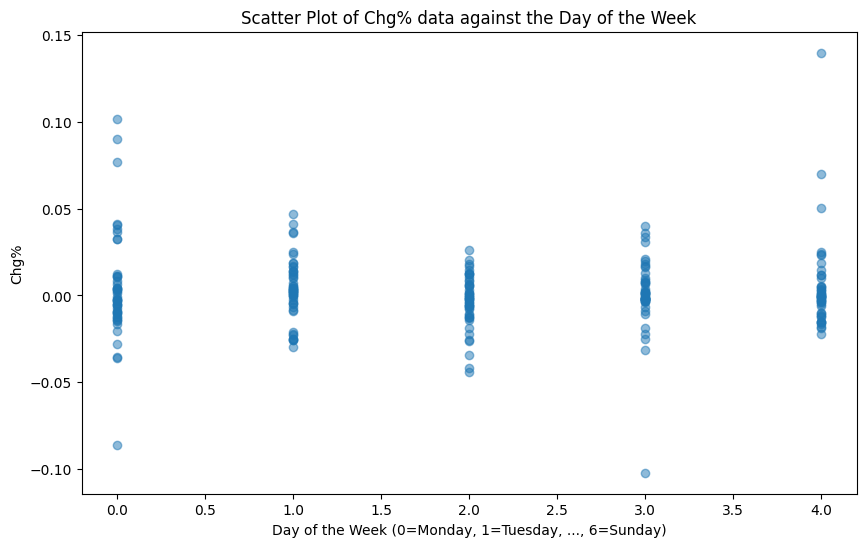

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file into a DataFrame
excel_file_path = '/content/Lab Session1 Data.xlsx'
df = pd.read_excel(excel_file_path, sheet_name='IRCTC Stock Price')

# Assuming column I is the 'Chg%' column and column A is the 'Date' column
# Adjust the column names accordingly based on your data
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Probability of making a loss over the stock
loss_probability = len(df[df['Chg%'].apply(lambda x: x < 0)]) / len(df)
print("Probability of making a loss over the stock:", loss_probability)

#  Probability of making a profit on Wednesday
wednesday_profit_probability = len(df[(df['Date'].dt.day_name() == 'Wednesday') & (df['Chg%'] > 0)]) / len(df[df['Date'].dt.day_name() == 'Wednesday'])
print("Probability of making a profit on Wednesday:", wednesday_profit_probability)

# Task 3: Conditional probability of making profit, given that today is Wednesday
conditional_profit_probability = wednesday_profit_probability / len(df[df['Date'].dt.day_name() == 'Wednesday'])
print("Conditional probability of making profit, given that today is Wednesday:", conditional_profit_probability)

# Task 4: Scatter plot of Chg% data against the day of the week
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'].dt.dayofweek, df['Chg%'], alpha=0.5)
plt.xlabel('Day of the Week (0=Monday, 1=Tuesday, ..., 6=Sunday)')
plt.ylabel('Chg%')
plt.title('Scatter Plot of Chg% data against the Day of the Week')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Load the data from the Excel file into a DataFrame
excel_file_path = '/content/Lab Session1 Data.xlsx'
df = pd.read_excel(excel_file_path)


matrix_A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
matrix_C = df[['Payment (Rs)']].to_numpy()

# Calculate the dimensionality of the vector space for Matrix A
dimensionality_A = matrix_A.shape[1]
print("Dimensionality of the vector space for Matrix A:", dimensionality_A)

# Calculate the number of vectors in the vector space
num_vectors_A = matrix_A.shape[0]
print("Number of vectors in the vector space for Matrix A:", num_vectors_A)

# Calculate the rank of Matrix A
rank_A = np.linalg.matrix_rank(matrix_A)
print("Rank of Matrix A:", rank_A)

# Using Pseudo-Inverse to find the cost of each product
A_pseudo_inverse = np.linalg.pinv(matrix_A)
cost_of_products = np.dot(A_pseudo_inverse, matrix_C)

# Using Pseudo-Inverse to calculate the model vector X
model_vector_X = np.dot(A_pseudo_inverse, matrix_C)

# Print the cost of each product and the model vector X
print("\nCost of each product using Pseudo-Inverse:")
print(cost_of_products)

print("\nModel Vector X using Pseudo-Inverse:")
print(model_vector_X)

X_values_whole_data = np.dot(np.linalg.pinv(df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()), df[['Payment (Rs)']].to_numpy())

# Check if X_values_whole_data and model_vector_X are approximately equal
are_X_values_equal = np.allclose(X_values_whole_data, model_vector_X)
print("Result:", are_X_values_equal)


Dimensionality of the vector space for Matrix A: 3
Number of vectors in the vector space for Matrix A: 10
Rank of Matrix A: 3

Cost of each product using Pseudo-Inverse:
[[ 1.]
 [55.]
 [18.]]

Model Vector X using Pseudo-Inverse:
[[ 1.]
 [55.]
 [18.]]

Do the X values obtained from square matrices match the one obtained from the whole purchase data matrix? True
